In [1]:
import ratinabox
import inspect
from tqdm import tqdm
from ratinabox.Environment import Environment 
from ratinabox.Agent import Agent 
from math import sin, cos, pi
from ratinabox.Neurons import *
import numpy as np
import math
from PIL import Image
from scipy import spatial
from scipy import ndimage
from ast import literal_eval
from ast import parse
from scipy.spatial import distance
import numpy.ma as ma
import seaborn as sns
import pandas as pd
import ast
import scipy.stats as stats
from ast import literal_eval
import random
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from sklearn.linear_model import Ridge
from sklearn.gaussian_process import GaussianProcessRegressor
import glob
from numpy import percentile
import matplotlib.cm as cm
from scipy import stats
from matplotlib.colors import Normalize
import os
from ratinabox.Environment import Environment 
from ratinabox.Neurons import *
from skimage import measure
from numpy import linalg
from numpy.linalg import norm
from skimage.measure import *
import os
from math import sin, cos, pi
from shapely.geometry import LineString

!pip install statsmodels

def padding(array, xx, yy):
    h = array.shape[0]
    w = array.shape[1]

    a = (xx - h) // 2
    aa = xx - a - h

    b = (yy - w) // 2
    bb = yy - b - w

    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant',constant_values=np.nan)

def angle_between(p2, p1):
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

n_q = 3


In [3]:
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/M4102Fa/')    
path = os.getcwd()
npy_files = sorted(glob.glob(os.path.join(path, "*.csv")))

npy_files[0]

'/home/lauren/Comparing_BVC_Trad/40.Gio_data/M4102Fa/rm_1_1.csv'

## Colin

In [2]:
# Colin
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1')
all_= sorted(glob.glob('**/*.csv'))
shapes = []
all_colin_nonan = []
for qq in tqdm(range(0,len(all_))):
    q = all_[qq]
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/{}'.format(q), header=None) 
    rm = rm.to_numpy()

    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    shapes.append(rm.shape)
   
    if rm.shape[0]<51 and rm.shape[1]<51 and rm.shape[0]>48 and rm.shape[1]>48:
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)

        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        id_ = q.split('/')[1].split('xy.csv')[0]
        rm1 = pd.DataFrame(rm)

    else:
        pass

all_cells_quadrants_colin = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin.append(quad)

len(all_cells_quadrants_colin)


  0%|          | 0/343 [00:00<?, ?it/s]/tmp/ipykernel_77174/3665401467.py:54: RuntimeWarning: invalid value encountered in divide
  rm = rm/np.nansum(rm)
/tmp/ipykernel_77174/3665401467.py:55: RuntimeWarning: All-NaN slice encountered
  rm = rm - np.nanmin(rm)
100%|██████████| 186/186 [00:00<00:00, 16362.69it/s]


186

In [3]:
# Colin Sander PC
os.chdir("/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_PC")  #Checking_Colins_PC2
all_= sorted(glob.glob('*'))

all_colin_sander_pc = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures//Hertz/Colin_Hz_PC/{}'.format(q))   #'/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Colin_PC/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 51, 51)
    all_colin_sander_pc.append(rm)
                
all_cells_quadrants_colin_sander_pc = []
for xx in tqdm(range(0,len(all_colin_sander_pc))):
  rmone = all_colin_sander_pc[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_sander_pc.append(quad)

len(all_cells_quadrants_colin_sander_pc)

100%|██████████| 400/400 [00:00<00:00, 16400.66it/s]


400

In [4]:
# Colin Sander SF
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_SF')  #Checking_Colins_SF2
all_= sorted(glob.glob('*'))

all_colin_sander_sf = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_SF/{}'.format(q))          
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 51, 51)
    all_colin_sander_sf.append(rm)
                
all_cells_quadrants_colin_sander_sf = []
for xx in tqdm(range(0,len(all_colin_sander_sf))):
  rmone = all_colin_sander_sf[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_sander_sf.append(quad)

len(all_cells_quadrants_colin_sander_sf)

100%|██████████| 400/400 [00:00<00:00, 16378.40it/s]


400

In [5]:
# Colin Gaussian PC
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_Gaussian_PC') #Figures/Checking_Colins_Gaussian_PC2')
all_= sorted(glob.glob('*'))

all_colin_gaussian_pc = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_Gaussian_PC/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 51, 51)
    all_colin_gaussian_pc.append(rm)
                
all_cells_quadrants_colin_gaussian_pc = []
for xx in tqdm(range(0,len(all_colin_gaussian_pc))):
  rmone = all_colin_gaussian_pc[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_gaussian_pc.append(quad)

len(all_cells_quadrants_colin_gaussian_pc)

100%|██████████| 400/400 [00:00<00:00, 16222.72it/s]


400

In [6]:
# Colin Gaussian SF
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_Gaussian_SF')    #Wills_new/Figures/Checking_Colins_Gaussian_SF2')
all_= sorted(glob.glob('*'))

all_colin_gaussian_sf = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_Gaussian_SF/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 51, 51)
    all_colin_gaussian_sf.append(rm)
                
all_cells_quadrants_colin_gaussian_sf = []
for xx in tqdm(range(0,len(all_colin_gaussian_sf))):
  rmone = all_colin_gaussian_sf[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_gaussian_sf.append(quad)

len(all_cells_quadrants_colin_gaussian_sf)

100%|██████████| 400/400 [00:00<00:00, 16151.35it/s]


400

In [7]:
# Colin Sander RW
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_RW') #C_RW_015
all_= sorted(glob.glob('*'))

all_colin_sander_rw = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_RW/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 51, 51)
    all_colin_sander_rw.append(rm)
                
all_cells_quadrants_colin_sander_rw = []
for xx in tqdm(range(0,len(all_colin_sander_rw))):
  rmone = all_colin_sander_rw[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_sander_rw.append(quad)

len(all_cells_quadrants_colin_sander_rw)

100%|██████████| 400/400 [00:00<00:00, 16195.32it/s]


400

In [8]:
# Colin Trad
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Gio_trad/50')
all_= sorted(glob.glob('*.npy'))

all_colin_trad = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Gio_trad/50/{}'.format(q)) 
    all_colin_trad.append(rm)

all_colin_trads = []
for rm in all_colin_trad:       
  try:
    if rm.shape[0] >= 24 and rm.shape[1] >= 24:
      rm = padding(rm, 51, 51)
      all_colin_trads.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_colin_trad = []
for xx in tqdm(range(0,len(all_colin_trads))):
  rmone = all_colin_trads[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_trad.append(quad)

len(all_cells_quadrants_colin_trad)

100%|██████████| 400/400 [00:00<00:00, 16554.07it/s]


400

In [9]:
## Per Rat 
# Colin
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_460')
all_= sorted(glob.glob('*.csv'))
shapes = []
all_colin_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_460/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_colin_nonan.append(rm)

for rm in all_colin_nonan:
    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]
    
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass

    shapes.append(rm.shape)
        
    if rm.shape[0]<=50 and rm.shape[1]<=50 and np.nanmean(rm)<=5:
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)
        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        
    else:
        pass
all_cells_quadrants_colin_460 = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_460.append(quad)

len(all_cells_quadrants_colin_460)

#########

# Colin
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_462')
all_= sorted(glob.glob('*.csv'))
shapes = []
all_colin_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_462/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_colin_nonan.append(rm)

for rm in all_colin_nonan:
    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]
    
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass

    shapes.append(rm.shape)
        
    if rm.shape[0]<=50 and rm.shape[1]<=50 and np.nanmean(rm)<=5:
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)
        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        
    else:
        pass
all_cells_quadrants_colin_462 = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_462.append(quad)

len(all_cells_quadrants_colin_462)

########

# Colin
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_463/')
all_= sorted(glob.glob('*.csv'))
shapes = []
all_colin_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_463/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_colin_nonan.append(rm)

for rm in all_colin_nonan:
    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]
    
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass

    shapes.append(rm.shape)
        
    if rm.shape[0]<=50 and rm.shape[1]<=50 and np.nanmean(rm)<=5:
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)
        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        
    else:
        pass
all_cells_quadrants_colin_463 = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_463.append(quad)

len(all_cells_quadrants_colin_463)

# Colin
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_480/')
all_= sorted(glob.glob('*.csv'))
shapes = []
all_colin_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_480/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_colin_nonan.append(rm)

for rm in all_colin_nonan:
    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]
    
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    shapes.append(rm.shape)
        
    if rm.shape[0]<=50 and rm.shape[1]<=50 and np.nanmean(rm)<=5:
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)
        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        
    else:
        pass
all_cells_quadrants_colin_480 = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_480.append(quad)

len(all_cells_quadrants_colin_480)

#####
# Colin
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_495/')
all_= sorted(glob.glob('*.csv'))
shapes = []
all_colin_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_495/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_colin_nonan.append(rm)

for rm in all_colin_nonan:
    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]
    
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    shapes.append(rm.shape)
        
    if rm.shape[0]<=50 and rm.shape[1]<=50 and np.nanmean(rm)<=5:
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)
        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        
    else:
        pass
all_cells_quadrants_colin_495 = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_495.append(quad)

len(all_cells_quadrants_colin_495)
#######

# Colin
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_496/')
all_= sorted(glob.glob('*.csv'))
shapes = []
all_colin_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_496/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_colin_nonan.append(rm)

for rm in all_colin_nonan:
    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]
    
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    shapes.append(rm.shape)
        
    if rm.shape[0]<=50 and rm.shape[1]<=50 and np.nanmean(rm)<=5:
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)
        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        
    else:
        pass
all_cells_quadrants_colin_496 = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_496.append(quad)

len(all_cells_quadrants_colin_496)

####

100%|██████████| 182/182 [00:00<00:00, 485.21it/s]
/tmp/ipykernel_77174/4250572922.py:58: RuntimeWarning: invalid value encountered in divide
  rm = rm/np.nansum(rm)
/tmp/ipykernel_77174/4250572922.py:59: RuntimeWarning: All-NaN slice encountered
  rm = rm - np.nanmin(rm)
100%|██████████| 24/24 [00:00<00:00, 17586.18it/s]


24

## Laurenz

In [10]:
# Laurenz SF Sander
all_cells_wills_sf_sander=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Laurenz_Hz_SF') #Checking_Laurenz_SF2, #Hertz/Laurenz_Hz_SF


all_= sorted(glob.glob('*.npy'))

all_wills_sf_sander_nonan = []
for q in tqdm(all_):
    rm  =np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Laurenz_Hz_SF/{}'.format(q))
    all_wills_sf_sander_nonan.append(rm)

for rm in all_wills_sf_sander_nonan:       
  try:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 27, 27)
    all_cells_wills_sf_sander.append(rm)
  except:
    pass
                
all_cells_quadrants_wills_sf_sander = []
for xx in tqdm(range(0,len(all_cells_wills_sf_sander))):
  rmone = all_cells_wills_sf_sander[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_wills_sf_sander.append(quad)

len(all_cells_quadrants_wills_sf_sander)

100%|██████████| 400/400 [00:00<00:00, 22032.38it/s]


400

In [11]:
# Laurenz Sander PC
all_cells_wills_pc_sander=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Laurenz_Hz_PC') #Checking_Laurenz_PC2
all_= sorted(glob.glob('*.npy'))

all_wills_pc_sander_nonan = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Laurenz_Hz_PC/{}'.format(q)) 
    all_wills_pc_sander_nonan.append(rm)

for rm in all_wills_pc_sander_nonan:       
  try:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)    
    rm = padding(rm, 27, 27)
    all_cells_wills_pc_sander.append(rm)
  except:
    pass
                
all_cells_quadrants_wills_pc_sander = []
for xx in tqdm(range(0,len(all_cells_wills_pc_sander))):
  rmone = all_cells_wills_pc_sander[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_wills_pc_sander.append(quad)

len(all_cells_quadrants_wills_pc_sander)

100%|██████████| 400/400 [00:00<00:00, 20686.31it/s]


400

In [12]:
# Laurenz RW SF
all_cells_laurenz_rw_sf=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Laurenz_Hz_RW') #Checking_Laurenz_RW2 #L_RW_011', #Hertz/Laurenz_Hz_RW
all_= sorted(glob.glob('*.npy'))

all_laurenz_rw_sf_nonan = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Laurenz_Hz_RW/{}'.format(q)) 
    all_laurenz_rw_sf_nonan.append(rm)

for rm in all_laurenz_rw_sf_nonan:       
  try:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)    
    rm = padding(rm, 27, 27)
    all_cells_laurenz_rw_sf.append(rm)
  except:
    pass
                
all_cells_quadrants_laurenz_rw_sf = []
for xx in tqdm(range(0,len(all_cells_laurenz_rw_sf))):
  rmone = all_cells_laurenz_rw_sf[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_rw_sf.append(quad)

len(all_cells_quadrants_laurenz_rw_sf)

100%|██████████| 400/400 [00:00<00:00, 20375.04it/s]


400

In [13]:
# Laurenz Gaussian PC
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Laurenz_Hz_Gaussian_PC')    #Checking_Laurenz_Gaussian_PC2')
all_= sorted(glob.glob('*.npy'))

all_wills_nonan_gaussian_pc = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Laurenz_Hz_Gaussian_PC/{}'.format(q)) 
    all_wills_nonan_gaussian_pc.append(rm)

all_wills_gaussian_pc = []
for rm in all_wills_nonan_gaussian_pc:       
  try:
    if rm.shape[0] >= 24 and rm.shape[1] >= 24:
      rm = padding(rm, 27, 27)
      all_wills_gaussian_pc.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_wills_gaussian_pc = []
for xx in tqdm(range(0,len(all_wills_gaussian_pc))):
  rmone = all_wills_gaussian_pc[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_wills_gaussian_pc.append(quad)

len(all_cells_quadrants_wills_gaussian_pc)

100%|██████████| 400/400 [00:00<00:00, 20831.69it/s]


400

In [14]:
# Laurenz Gaussian SF
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Laurenz_Hz_Gaussian_SF') #Figures/Checking_Laurenz_Gaussian_SF2')
all_= sorted(glob.glob('*.npy'))

all_wills_nonan_gaussian_sf = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Laurenz_Hz_Gaussian_SF/{}'.format(q)) 
    all_wills_nonan_gaussian_sf.append(rm)

all_wills_gaussian_sf = []
for rm in all_wills_nonan_gaussian_sf:       
  try:
    if rm.shape[0] >= 24 and rm.shape[1] >= 24:
      rm = padding(rm, 27, 27)
      all_wills_gaussian_sf.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_wills_gaussian_sf = []
for xx in tqdm(range(0,len(all_wills_gaussian_sf))):
  rmone = all_wills_gaussian_sf[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_wills_gaussian_sf.append(quad)

len(all_cells_quadrants_wills_gaussian_sf)

100%|██████████| 400/400 [00:00<00:00, 20549.74it/s]


400

In [15]:
# Laurenz Trad
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Gio_trad/25')
all_= sorted(glob.glob('*.npy'))

all_wills_trad = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Gio_trad/25/{}'.format(q)) 
    all_wills_trad.append(rm)

all_wills_trads = []
for rm in all_wills_trad:       
  try:
    if rm.shape[0] >= 24 and rm.shape[1] >= 24:
      rm = padding(rm, 27, 27)
      all_wills_trads.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_wills_trad = []
for xx in tqdm(range(0,len(all_wills_trads))):
  rmone = all_wills_trads[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_wills_trad.append(quad)

len(all_cells_quadrants_wills_trad)

100%|██████████| 400/400 [00:00<00:00, 20274.83it/s]


400

## Gio

In [16]:
# Gio Sander SF
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Checking_Gio_SF2')      #Checking_Gio_SF2
all_= sorted(glob.glob('*.npy'))

all_gio_sander_sf = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Checking_Gio_SF2/{}'.format(q))
    rm = rm/np.nansum(rm)
    
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 30, 30)
    all_gio_sander_sf.append(rm)
                
all_cells_quadrants_gio_sander_sf = []
for xx in tqdm(range(0,len(all_gio_sander_sf))):
  rmone = all_gio_sander_sf[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_sander_sf.append(quad)

len(all_cells_quadrants_gio_sander_sf)

100%|██████████| 400/400 [00:00<00:00, 19885.29it/s]


400

In [17]:
# Gio
all_cells_gio=[]
shapes=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/')
all_= sorted(glob.glob('**/**/*.csv'))
shapes = []
all_gio_nonan = []
for q in tqdm(all_):
  rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/{}'.format(q), header=None) 
  rm = rm.to_numpy()
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  shapes.append(rm.shape)
    
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
    id_ = q.split('/')[0]+'_'+q.split('/')[1]+'_'+q.split('/')[2].split('.csv')[0]
    rm1 = pd.DataFrame(rm)
    #rm1.to_csv('/home/lauren/Comparing_BVC_Trad/55.Gio_data/Gio_for_Will/{}.csv'.format(id_),index=False)

  else:
    pass

all_cells_quadrants_gio = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio.append(quad)

len(all_cells_quadrants_gio)


100%|██████████| 1937/1937 [00:00<00:00, 21975.74it/s]


1937

In [18]:
# Gio Sander PC Figure
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_PC')           #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40')
all_= sorted(glob.glob('*'))

all_gio_sander_pc_figures = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_PC/{}'.format(q))       #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_gio_sander_pc_figures.append(rm)
                

os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_SF')           #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40')
all_= sorted(glob.glob('*'))

all_gio_sander_sf_figures = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_SF/{}'.format(q))       #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_gio_sander_sf_figures.append(rm)



os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_Normal_SF')           #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40')
all_= sorted(glob.glob('*'))

all_gio_sander_sf_normal_figures = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_Normal_SF/{}'.format(q))       #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_gio_sander_sf_normal_figures.append(rm)

                

os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_Normal_PC')           #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40')
all_= sorted(glob.glob('*'))

all_gio_sander_pc_normal_figures = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_Normal_PC/{}'.format(q))       #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_gio_sander_pc_normal_figures.append(rm)                

100%|██████████| 400/400 [00:00<00:00, 5512.85it/s]


In [19]:
# Gio Sander PC
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Checking_Gio_PC2')           #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40')
all_= sorted(glob.glob('*'))

all_gio_sander_pc = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Checking_Gio_PC2/{}'.format(q))       #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 30, 30)
    all_gio_sander_pc.append(rm)
                
all_cells_quadrants_gio_sander_pc = []
for xx in tqdm(range(0,len(all_gio_sander_pc))):
  rmone = all_gio_sander_pc[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_sander_pc.append(quad)

len(all_cells_quadrants_gio_sander_pc)

100%|██████████| 400/400 [00:00<00:00, 19881.75it/s]


400

In [20]:
# Gio Gaussian PC
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Gio_Hz_Gaussian_PC') #Figures/Checking_Gio_Gaussian_PC2')
all_= sorted(glob.glob('*.npy'))

shapes = []

all_gio_gaussian_pc = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Gio_Hz_Gaussian_PC/{}'.format(q)) 
    
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    shapes.append(rm.shape)
    rm = padding(rm, 30, 30)
    all_gio_gaussian_pc.append(rm)
                
all_cells_quadrants_gio_gaussian_pc = []
for xx in tqdm(range(0,len(all_gio_gaussian_pc))):
  rmone = all_gio_gaussian_pc[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_gaussian_pc.append(quad)

len(all_cells_quadrants_gio_gaussian_pc)

100%|██████████| 400/400 [00:00<00:00, 18278.42it/s]


400

In [21]:
# Gio Gaussian SF
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Gio_Hz_Gaussian_SF')  #Figures/Checking_Gio_Gaussian_SF2')
all_= sorted(glob.glob('*.npy'))

all_gio_gaussian_sf = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Gio_Hz_Gaussian_SF/{}'.format(q)) 
    
    rm = rm/np.nansum(rm)
    
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 30, 30)
    all_gio_gaussian_sf.append(rm)
                
all_cells_quadrants_gio_gaussian_sf = []
for xx in tqdm(range(0,len(all_gio_gaussian_sf))):
  rmone = all_gio_gaussian_sf[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_gaussian_sf.append(quad)

len(all_cells_quadrants_gio_gaussian_sf)

100%|██████████| 400/400 [00:00<00:00, 19957.67it/s]


400

In [22]:
# Gio Trad
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Gio_trad/30')
all_= sorted(glob.glob('*.npy'))

all_gio_trad = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Gio_trad/30/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    
    rm = padding(rm, 30, 30)
    all_gio_trad.append(rm)
                
all_cells_quadrants_gio_trad = []
for xx in tqdm(range(0,len(all_gio_trad))):
  rmone = all_gio_trad[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_trad.append(quad)

len(all_cells_quadrants_gio_trad)

100%|██████████| 400/400 [00:00<00:00, 20046.38it/s]


400

In [23]:
# Gio RW
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Gio_Hz_RW') #G_RW_0205, #Hertz/Gio_Hz_RW
all_= sorted(glob.glob('*.npy'))

all_gio_rw = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Gio_Hz_RW/{}'.format(q))
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm) 
    all_gio_rw.append(rm)
                
all_cells_quadrants_gio_rw = []
for xx in tqdm(range(0,len(all_gio_rw))):
  rmone = all_gio_rw[xx]
  rmone = rmone/np.nansum(rmone)
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_rw.append(quad)

len(all_cells_quadrants_gio_rw)

100%|██████████| 400/400 [00:00<00:00, 15605.12it/s]


400

### Per Rat

In [24]:
#@title Gio Per RAT
all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4102Fa')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4102Fa/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass

  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4102Fa = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4102Fa.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4104a/')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4104a/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4104a = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4104a.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4113Fa')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4113Fa/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4113Fa = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4113Fa.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4115a')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4115a/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4115a = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4115a.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4116a')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4116a/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4116a = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4116a.append(quad)

###

100%|██████████| 163/163 [00:00<00:00, 1295.68it/s]
0it [00:00, ?it/s]
100%|██████████| 146/146 [00:00<00:00, 22130.33it/s]


In [25]:
#@title Gio Per RAT Trial 2s
all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4102Fa')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4102Fa/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4102Fa_2 = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4102Fa_2.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4104a/')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4104a/{}'.format(q), header=None) 
    rm = rm.to_numpy()

    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass

                
all_cells_quadrants_gio_1_M4104a_2 = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4104a_2.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4113Fa')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4113Fa/{}'.format(q), header=None) 
    rm = rm.to_numpy()


    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4113Fa_2 = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4113Fa_2.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4115a')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4115a/{}'.format(q), header=None) 
    rm = rm.to_numpy()


    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4115a_2 = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4115a_2.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4116a')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4116a/{}'.format(q), header=None) 
    rm = rm.to_numpy()

    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4116a_2 = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4116a_2.append(quad)

###

100%|██████████| 146/146 [00:00<00:00, 1296.89it/s]
0it [00:00, ?it/s]


## Laurenz CA1 and Sub

In [26]:
all_laurenz_ca1=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/')
all_= sorted(glob.glob('**/*.csv'))

shapes = []
all_laurenz_nonan_ca1 = []
for q in tqdm(all_):
  rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/{}'.format(q), header=None) 
  rm = rm.to_numpy()  
  try:
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) >5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)

    if rm.shape[0] == 25 and rm.shape[1] == 25 :
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1.append(rm)
      id_ = q.split('/')[1].split('.csv')[0]
      rm1 = pd.DataFrame(rm)
      #rm1.to_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Laurenz_CA1_for_Will/{}.csv'.format(id_),index=False)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1 = []
for xx in tqdm(range(0,len(all_laurenz_ca1))):
  rmone = all_laurenz_ca1[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1.append(quad)

len(all_cells_quadrants_laurenz_ca1)

100%|██████████| 353/353 [00:00<00:00, 13407.13it/s]


353

In [27]:
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial')
all_= sorted(glob.glob('**/*.csv'))

all_laurenz_nonan_sub = []
shapes = []
for q in tqdm(all_):
  rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/{}'.format(q), header=None) 
  rm = rm.to_numpy()   
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)

    if rm.shape[0] == 25 and rm.shape[1] == 25:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)
      all_laurenz_sub.append(rm)
      id_ = q.split('/')[2].split('.csv')[0]
      rm1=pd.DataFrame(rm)
      #rm1.to_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_Sub_new/Laurenz_sub_for_will/{}.csv'.format(id_), index=False)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub.append(quad)

len(all_cells_quadrants_laurenz_sub)


100%|██████████| 335/335 [00:00<00:00, 20721.93it/s]


335

### Per Rat

In [28]:
all_laurenz_ca1_1=[]
shapes = []
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_27')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_27/{}'.format(q), header=None) 
    rm = rm.to_numpy()

    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    
    if rm.shape[0] >=23 and rm.shape[1] >=23 :
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_1.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_27 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_1))):
  rmone = all_laurenz_ca1_1[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_27.append(quad)

#########
all_laurenz_ca1_2=[]
names = []
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_32/')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_32/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_2.append(rm)
      names.append(q)
    else:
      pass
  except:
    pass
              
all_cells_quadrants_laurenz_ca1_32 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_2))):
  rmone = all_laurenz_ca1_2[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_32.append(quad)

########
all_laurenz_ca1_3=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_44')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_44/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0]>=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_3.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_44 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_3))):
  rmone = all_laurenz_ca1_3[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_44.append(quad)

######################################
all_laurenz_ca1_4=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_45')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_45/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_4.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_45 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_4))):
  rmone = all_laurenz_ca1_4[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_45.append(quad)

##############
all_laurenz_ca1_5=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_76')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_76/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) >5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_5.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_76 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_5))):
  rmone = all_laurenz_ca1_5[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_76.append(quad)

#########
all_laurenz_ca1_6=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_661')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_661/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 3:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_6.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_661 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_6))):
  rmone = all_laurenz_ca1_6[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_661.append(quad)

###########
all_laurenz_ca1_7=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_673')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_673/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_7.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_673 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_7))):
  rmone = all_laurenz_ca1_7[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_673.append(quad)


##########
all_laurenz_ca1_8=[]

os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_678')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_678/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_8.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_678 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_8))):
  rmone = all_laurenz_ca1_8[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_678.append(quad)

len(all_cells_quadrants_laurenz_ca1_678)


100%|██████████| 216/216 [00:00<00:00, 20300.02it/s]


216

In [29]:
#Per Rat Sub
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_372')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_372/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm= rm- np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_sub.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub_372 = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub_372.append(quad)

#################
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_372_2')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_372_2/{}'.format(q), header=None) 
    rm = rm.to_numpy()

    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm= rm- np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_sub.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub_372_2 = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub_372_2.append(quad)

#################
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_373')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_373/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm= rm- np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_sub.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub_373 = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub_373.append(quad)

#################
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_373_2')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_373_2/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm= rm- np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_sub.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub_373_2 = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub_373_2.append(quad)

##################
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_375')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_375/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm= rm- np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_sub.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub_375 = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub_375.append(quad)
##################
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_375_2')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_375_2/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm= rm- np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_sub.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub_375_2 = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub_375_2.append(quad)


100%|██████████| 23/23 [00:00<00:00, 18576.74it/s]


## Behaviour

In [40]:
train_traj = pd.read_csv('/home/lauren/Comparing_BVC_Trad/Trajs/Gio_square.csv', header=None)
train_traj = train_traj.to_numpy()

xs = [item[0] for item in train_traj]
ys = [item[1] for item in train_traj]

coords_rescaled=[]
for m in tqdm(range(0,len(xs))):
  if math.isnan(xs[m])==False:
    if math.isnan(xs[m])==False:
      coords_rescaled.append([(xs[m]-0.)/127,(ys[m]-0.)/127]) 

np.max(coords_rescaled)

100%|██████████| 28777/28777 [00:00<00:00, 201757.97it/s]


0.2952755905511811

In [41]:
# Quadrants
quadrant_ranges = [[0,0.1],[0.1,0.2],[0.2,0.3]]
quadrant_references = []
speed_filter = 0.0001 

quadrant_results_hist = []
quadrant_kl_results_gio = []

uniform = [1/8]*8

def KL(a, b):
    a = np.asarray(a) 
    b = np.asarray(b) 

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))
###

for xx in quadrant_ranges:
    for yy in quadrant_ranges:
        angles_q1 = []

        for m in range(0,len(coords_rescaled)-1):
            coord1 = coords_rescaled[m]
            x_0=coords_rescaled[m][0]
            y_0=coords_rescaled[m][1]
            x_1 = coords_rescaled[m+1][0]
            y_1 = coords_rescaled[m+1][1]
            if xx[0] < x_0 < xx[1] and yy[0] < y_0 < yy[1] and xx[0] < x_1 < xx[1] and yy[0] < y_1 < yy[1]:
                if np.isnan(x_0)==False and np.isnan(y_0)==False and np.isnan(x_1)==False and np.isnan(y_1)==False:
                    xchange = x_1-x_0
                    ychange = y_1-y_0
                    if abs(xchange)>speed_filter or abs(ychange)>speed_filter:
                        p = angle_between([0,0],[xchange,ychange])
                        angles_q1.append(p)
                    else:
                        pass
                else:
                    pass
            else:
                pass

        angles_q1_2 = []
        for m in angles_q1:
            if m >337.5:
                angles_q1_2.append(m-360)
            else: 
                angles_q1_2.append(m)

        hist, bin_edges = np.histogram(angles_q1_2, bins =np.array([-22.5,22.5,67.5,112.5,157.5,202.5,247.5,292.5, 337.5]), density=True)
        hist_q1 = hist.tolist()
        hist_q1 = hist_q1/np.nansum(hist_q1)

        quadrant_results_hist.append(hist_q1)
        quadrant_references.append([xx,yy])

        quadrant_kl_results_gio.append(KL(uniform, hist_q1))

quadrant_results_hist[4]

array([0.11373708, 0.07828656, 0.08862629, 0.11373708, 0.12555391,
       0.17134417, 0.17134417, 0.13737075])

In [42]:
quadrant_kl_results_gio

[0.05572382672807603,
 0.10064027441315423,
 0.07010104062887312,
 0.11622524324556943,
 0.033894924815202676,
 0.058729474794527566,
 0.06221707608583606,
 0.13029981698747944,
 0.05747458509703755]

In [43]:
#@title Laurenz 

train_traj = pd.read_csv('/home/lauren/Comparing_BVC_Trad/Trajs/Laurenz_pos_data_9_2.csv', header=None)
train_traj = train_traj.to_numpy()

xs = [item[0] for item in train_traj]
ys = [item[1] for item in train_traj]

coords_rescaled_laurenz=[]
for m in tqdm(range(0,len(xs))):
  if math.isnan(xs[m])==False:
    if math.isnan(xs[m])==False:
      coords_rescaled_laurenz.append([(xs[m]-0.)/835,(ys[m]-0.)/835]) 

np.max(coords_rescaled_laurenz)

100%|██████████| 30000/30000 [00:00<00:00, 1295644.63it/s]


0.2994011976047904

In [44]:
# Quadrants
quadrant_ranges = [[0,0.1],[0.1,0.2],[0.2,0.3]]
quadrant_references = []
speed_filter = 0.0001 

quadrant_results_hist = []
quadrant_kl_results_laurenz = []

uniform = [1/8]*8

def KL(a, b):
    a = np.asarray(a) 
    b = np.asarray(b) 

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))
###

for xx in quadrant_ranges:
    for yy in quadrant_ranges:
        angles_q1 = []

        for m in range(0,len(coords_rescaled_laurenz)-1):
            coord1 = coords_rescaled_laurenz[m]
            x_0=coords_rescaled_laurenz[m][0]
            y_0=coords_rescaled_laurenz[m][1]
            x_1 = coords_rescaled_laurenz[m+1][0]
            y_1 = coords_rescaled_laurenz[m+1][1]
            if xx[0] < x_0 < xx[1] and yy[0] < y_0 < yy[1] and xx[0] < x_1 < xx[1] and yy[0] < y_1 < yy[1]:
                if np.isnan(x_0)==False and np.isnan(y_0)==False and np.isnan(x_1)==False and np.isnan(y_1)==False:
                    xchange = x_1-x_0
                    ychange = y_1-y_0
                    if abs(xchange)>speed_filter or abs(ychange)>speed_filter:
                        p = angle_between([0,0],[xchange,ychange])
                        angles_q1.append(p)
                    else:
                        pass
                else:
                    pass
            else:
                pass

        angles_q1_2 = []
        for m in angles_q1:
            if m >337.5:
                angles_q1_2.append(m-360)
            else: 
                angles_q1_2.append(m)

        hist, bin_edges = np.histogram(angles_q1_2, bins =np.array([-22.5,22.5,67.5,112.5,157.5,202.5,247.5,292.5, 337.5]), density=True)
        hist_q1 = hist.tolist()
        hist_q1 = hist_q1/np.nansum(hist_q1)

        quadrant_results_hist.append(hist_q1)
        quadrant_references.append([xx,yy])

        quadrant_kl_results_laurenz.append(KL(uniform, hist_q1))

quadrant_results_hist[4]

array([0.15845649, 0.09482759, 0.13341544, 0.10796388, 0.11904762,
       0.08497537, 0.15558292, 0.14573071])

In [45]:
quadrant_kl_results_laurenz

[0.06694592696280527,
 0.03586437666709448,
 0.08361553861976902,
 0.08128522437294786,
 0.022860086487719568,
 0.06894514001458774,
 0.09698850632458524,
 0.07660592919203418,
 0.09606401276560216]

In [46]:
#@title Colin

train_traj = pd.read_csv('/home/lauren/Comparing_BVC_Trad/Trajs/PosData_Colins_463_270516.csv')
train_traj = train_traj.to_numpy()

xs = [item[0] for item in train_traj]
ys = [item[1] for item in train_traj]

coords_rescaled_colin=[]
for m in tqdm(range(0,len(xs))):
  if math.isnan(xs[m])==False:
    if math.isnan(xs[m])==False:
      coords_rescaled_colin.append([(xs[m]-0.)/6.645,(ys[m]-0.)/6.645]) 

np.max(coords_rescaled_colin)

100%|██████████| 120050/120050 [00:00<00:00, 610253.41it/s]


0.299974918485076

In [47]:
# Quadrants
quadrant_ranges = [[0,0.1],[0.1,0.2],[0.2,0.3]]
quadrant_references = []
speed_filter = 0.0001 

quadrant_results_hist = []
quadrant_kl_results_colin = []

uniform = [1/8]*8

def KL(a, b):
    a = np.asarray(a) 
    b = np.asarray(b) 

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))
###

for xx in quadrant_ranges:
    for yy in quadrant_ranges:
        angles_q1 = []

        for m in range(0,len(coords_rescaled_colin)-1):
            coord1 = coords_rescaled_colin[m]
            x_0=coords_rescaled_colin[m][0]
            y_0=coords_rescaled_colin[m][1]
            x_1 = coords_rescaled_colin[m+1][0]
            y_1 = coords_rescaled_colin[m+1][1]
            if xx[0] < x_0 < xx[1] and yy[0] < y_0 < yy[1] and xx[0] < x_1 < xx[1] and yy[0] < y_1 < yy[1]:
                if np.isnan(x_0)==False and np.isnan(y_0)==False and np.isnan(x_1)==False and np.isnan(y_1)==False:
                    xchange = x_1-x_0
                    ychange = y_1-y_0
                    if abs(xchange)>speed_filter or abs(ychange)>speed_filter:
                        p = angle_between([0,0],[xchange,ychange])
                        angles_q1.append(p)
                    else:
                        pass
                else:
                    pass
            else:
                pass

        angles_q1_2 = []
        for m in angles_q1:
            if m >337.5:
                angles_q1_2.append(m-360)
            else: 
                angles_q1_2.append(m)

        hist, bin_edges = np.histogram(angles_q1_2, bins =np.array([-22.5,22.5,67.5,112.5,157.5,202.5,247.5,292.5, 337.5]), density=True)
        hist_q1 = hist.tolist()
        hist_q1 = hist_q1/np.nansum(hist_q1)

        quadrant_results_hist.append(hist_q1)
        quadrant_references.append([xx,yy])

        quadrant_kl_results_colin.append(KL(uniform, hist_q1))

quadrant_results_hist[4]

array([0.11859008, 0.12941926, 0.15171462, 0.11360017, 0.12347383,
       0.10234632, 0.16254379, 0.09831192])

In [48]:
quadrant_kl_results_gio

[0.05572382672807603,
 0.10064027441315423,
 0.07010104062887312,
 0.11622524324556943,
 0.033894924815202676,
 0.058729474794527566,
 0.06221707608583606,
 0.13029981698747944,
 0.05747458509703755]

In [49]:
np.nanmean([quadrant_kl_results_gio[:4]+quadrant_kl_results_gio[5:]+
                        quadrant_kl_results_colin[:4]+quadrant_kl_results_colin[5:]+
                            quadrant_kl_results_laurenz[:4]+quadrant_kl_results_laurenz[5:]])

0.06940291815834211

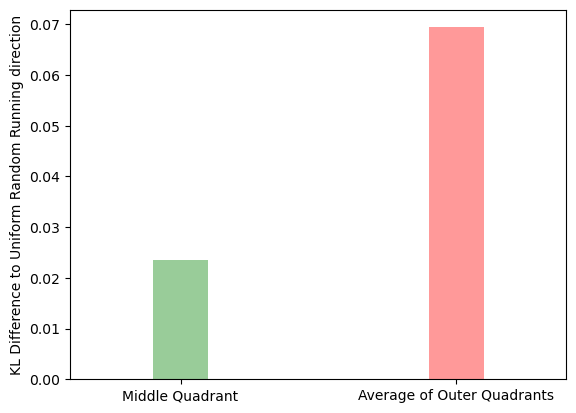

In [50]:
x = np.arange(2) 
y1 = [np.nanmean([quadrant_kl_results_gio[4],quadrant_kl_results_laurenz[4],quadrant_kl_results_colin[4]]), 
            np.nanmean([quadrant_kl_results_gio[:4]+quadrant_kl_results_gio[5:]+
                        quadrant_kl_results_colin[:4]+quadrant_kl_results_colin[5:]+
                            quadrant_kl_results_laurenz[:4]+quadrant_kl_results_laurenz[5:]] )
            ] 
width = 0.2
  
# plot data in grouped manner of bar type 
plt.bar(x, y1, width, color=['green', 'red'], alpha=0.4) 
#plt.bar(x, y2, width, color='red', alpha=0.4) 
#plt.bar(x+0.2, y3, width, color='green', alpha=0.4) 

plt.xticks(x, ['Middle Quadrant',  'Average of Outer Quadrants']) 

#plt.xlabel([]) 
plt.ylabel('KL Difference to Uniform Random Running direction') 
#plt.legend(["PC", "SF", "Subicular Cells"]) 

#plt.text(0, 0.7, "0% ", ha="left", va="top", size='medium')
#plt.text(0.9, 0.7, "0% ", ha="left", va="top", size='medium')

plt.xlim([-0.4,1.4])
#plt.ylim([0,0.3])
plt.show() 


## Violin Plot

In [52]:
#Testing at the Rat Level 
middle_segments = [quadrant_kl_results_gio[4],quadrant_kl_results_colin[4],quadrant_kl_results_laurenz[4]]

outer_segments = [np.nanmean(np.array([quadrant_kl_results_gio[:4]+quadrant_kl_results_gio[5:]])),
                    np.nanmean(np.array([quadrant_kl_results_colin[:4]+quadrant_kl_results_colin[5:]])),  
                        np.nanmean(np.array([quadrant_kl_results_laurenz[:4]+quadrant_kl_results_laurenz[5:]]))
                    ]

arctan_middle = np.arctanh(middle_segments)
arctan_outer = np.arctanh(outer_segments)
t_test_result1 =scipy.stats.ttest_rel(arctan_middle, arctan_outer,nan_policy='omit')
m1=t_test_result1[1]
t_test_result1

TtestResult(statistic=-9.968512722603075, pvalue=0.009913872726498095, df=2)

In [86]:
violin_data = pd.DataFrame({'Cells':
                ['Inner segment']* 3 +
                ['Outer segments']* 24,

        'correlation':  [quadrant_kl_results_gio[4]]+[quadrant_kl_results_colin[4]]+[quadrant_kl_results_laurenz[4]]+
                        quadrant_kl_results_gio[:4]+quadrant_kl_results_gio[5:] +
                        quadrant_kl_results_colin[:4]+quadrant_kl_results_colin[5:] +
                        quadrant_kl_results_laurenz[:4]+quadrant_kl_results_laurenz[5:],

       'Comparison':    ['Inner segment']*3+
                        ['Outer segments']*24     
                         })
violin_data.head()

,Cells,correlation,Comparison
0,Inner segment,0.033895,Inner segment
1,Inner segment,0.013701,Inner segment
2,Inner segment,0.022860,Inner segment
3,Outer segments,0.055724,Outer segments
4,Outer segments,0.100640,Outer segments


<Figure size 640x480 with 0 Axes>

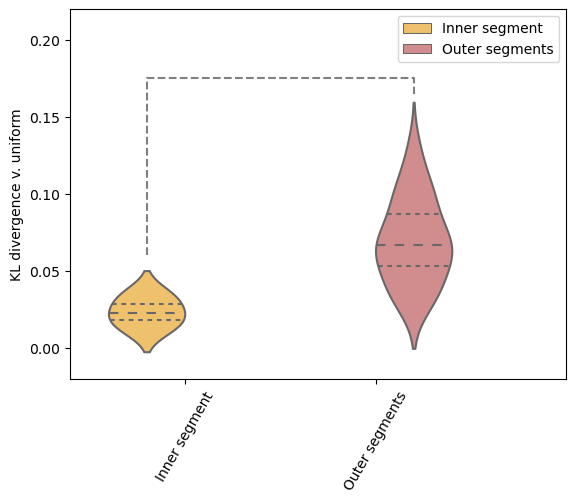

<Figure size 640x480 with 0 Axes>

In [103]:
from matplotlib.colors import to_rgb
from matplotlib.colors import to_rgba

def whiten(color, factor):
    return np.array(to_rgb(color)) * factor + (1 - factor)

my_pal = {"Inner segment": whiten('orange', 0.64), "Outer segments": whiten('indianred', 0.75)}

#palette_b = {"Inner segment": to_rgba('red', 0.5), 'b': to_rgba('blue', 0.5), }

violin_data = pd.DataFrame({'Cells':
                ['Inner segment']* 3 +
                ['Outer segments']* 24,

        'correlation':  [quadrant_kl_results_gio[4]]+[quadrant_kl_results_colin[4]]+[quadrant_kl_results_laurenz[4]]+
                        quadrant_kl_results_gio[:4]+quadrant_kl_results_gio[5:] +
                        quadrant_kl_results_colin[:4]+quadrant_kl_results_colin[5:] +
                        quadrant_kl_results_laurenz[:4]+quadrant_kl_results_laurenz[5:],

       'Comparison':    ['Inner segment']*3+
                        ['Outer segments']*24     
                         })

sns.violinplot(data=violin_data, y='correlation', x='Cells', hue='Comparison', split=False, inner="quart", palette=my_pal, saturation=0.8)
#plt.text(0.04, 0.01, "n=3", ha="left", va="top", size='small')
#plt.text(1.47, 0.04, "n=24", ha="left", va="top",size='small')

#plt.text(0.1, 0.16, "p={:.3f}*".format(m1), ha="left", va="top", size='small', rotation=0)

ypoints = np.array([0.06,0.175,0.175,0.165])
xpoints = np.array([-0.197,-0.197,1.2,1.2])
plt.plot(xpoints,ypoints, linestyle='--', color = 'grey')

plt.xticks(rotation=60)
plt.xlabel('')
plt.ylabel('KL divergence v. uniform')
plt.ylim([-0.02,0.22])
plt.xlim([-0.6,2])

plt.legend(loc="upper right")
plt.figure()


## Polar Plot

/tmp/ipykernel_132887/3497391684.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(data.compass)


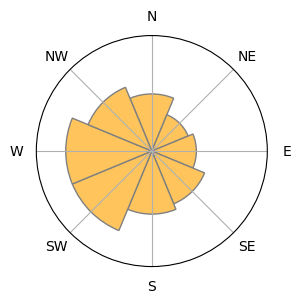

In [105]:
from matplotlib.gridspec import GridSpec

data = pd.DataFrame({'value': [0.11373708, 0.07828656, 0.08862629, 0.11373708, 0.12555391, 0.17134417, 0.17134417, 0.13737075],
                     'bearing': range(0, 360, 45),
                     'compass': ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'],
                     'color': [whiten('orange', 0.64) ]*8})

data.index = data['bearing'] * 2*pi / 360

fig = plt.figure(figsize=(8, 3))
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

#ax1 = fig.add_subplot(gs[0, 0])
#ax1.bar(x=data['compass'], height=data['value'], width=1)

ax2 = fig.add_subplot(gs[0, 0], projection='polar')
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.bar(x=data.index, height=data['value'], width=pi/4, color=data.color, alpha=1, edgecolor='grey')
ax2.set_yticklabels([])
#ax2.ylim([0,0.001])
ax2.set_xticklabels(data.compass)
ax2.set_rgrids([])
ax2.set_ylim([0,0.23])
plt.show()

/tmp/ipykernel_132887/1711072369.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(data.compass)


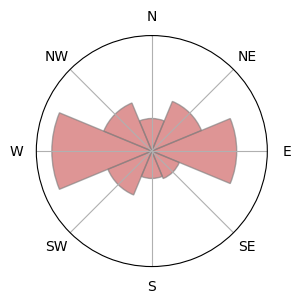

In [35]:
data = pd.DataFrame({'value': quadrant_results_hist[1].tolist(),
                        'sns': [1,2,3,4,5,6,7,8],
                     'bearing': range(0, 360, 45),
                     'compass': ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'],
                     'color': ['indianred'] *8})

data.index = data['bearing'] * 2*pi / 360

fig = plt.figure(figsize=(8, 3))
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax2 = fig.add_subplot(gs[0, 0], projection='polar')
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)

ax2.bar(x=data.index, height=data['value'], width=pi/4, color=data.color, alpha=0.65, edgecolor='grey')
ax2.set_yticklabels([])
ax2.set_xticklabels(data.compass)
ax2.set_rgrids([])
ax2.set_ylim([0,0.27])
plt.show()

In [11]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [13]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [10]:
plt.cm.viridis()

TypeError: __call__() missing 1 required positional argument: 'X'

In [167]:
quadrant_results_hist[1].tolist()

8

In [164]:
outside = quadrant_results_hist[:4]+quadrant_results_hist[5:]
outside

[array([0.12234197, 0.15219924, 0.15715118, 0.07034664, 0.12831343,
        0.07777454, 0.19807748, 0.09379551]),
 array([0.076083  , 0.12559155, 0.19839825, 0.0695304 , 0.06406989,
        0.11103021, 0.2337095 , 0.12158719]),
 array([0.12511144, 0.08380386, 0.15066865, 0.05616642, 0.19405646,
        0.08469539, 0.15482912, 0.15066865]),
 array([0.26198779, 0.08544028, 0.0836966 , 0.10680035, 0.19703575,
        0.1168265 , 0.05448997, 0.09372276]),
 array([0.16189536, 0.07551826, 0.07551826, 0.10612043, 0.21964462,
        0.10908193, 0.12043435, 0.13178677]),
 array([0.17527347, 0.07300941, 0.17171203, 0.14245739, 0.13533452,
        0.06715848, 0.15034342, 0.08471127]),
 array([0.06398305, 0.06059322, 0.26059322, 0.1279661 , 0.07161017,
        0.11652542, 0.20254237, 0.09618644]),
 array([0.14133198, 0.087697  , 0.19522115, 0.06380275, 0.14006101,
        0.14997458, 0.13751906, 0.08439248])]

In [165]:
np.nanmean(outside)

0.125